In [96]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\statsfaction'

In [97]:
from prediction_prime_overall.src.predict import predict_and_explain_players, analyze_individual_ID
from prediction_prime_overall.src.eval import create_polar_plot
import prediction_prime_overall.config as CONFIG

# Import your group to analyze

In [98]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE  FIFA = 2024 and Age < 23 and potential > 70 and overall <90
GROUP BY ID
order by potential DESC;
"""


import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(CONFIG.DATABASE)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

# Seiten wurden umgestellt und Feld hat jetzt neuen Inhalt
# df_prospect['Position'] = [value.strip() for item in df_prospect["Position"] for value in item.split(',')]
# df_prospect['Position'] = [i.replace(' ',',') for i in df_prospect['Position']]

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Preferred foot,Skill moves,Weak foot,International reputation,Work rate,Body type,Real face,birthDate,league,club_prestige
0,22.0,238794,Vini Jr.,22.0,https://cdn.sofifa.net/players/238/794/24_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,89.0,94.0,Real Madrid,...,None,None,None,None,None,None,None,None,None,None
1,20.0,256790,J. Musiala,20.0,https://cdn.sofifa.net/players/256/790/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,93.0,FC Bayern München,...,None,None,None,None,None,None,None,None,None,None
2,20.0,251854,Pedri,20.0,https://cdn.sofifa.net/players/251/854/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,86.0,92.0,FC Barcelona,...,None,None,None,None,None,None,None,None,None,None
3,22.0,247635,K. Kvaratskhelia,22.0,https://cdn.sofifa.net/players/247/635/24_60.png,Georgia,https://cdn.sofifa.net/flags/ge.png,86.0,92.0,Napoli,...,None,None,None,None,None,None,None,None,None,None
4,20.0,256630,F. Wirtz,20.0,https://cdn.sofifa.net/players/256/630/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,91.0,Bayer 04 Leverkusen,...,None,None,None,None,None,None,None,None,None,None


## Choose a from a Set of trained models

In [99]:
import pickle
NAME = "offense_potential_forward_min_pot_min_prime"
ACTUAL_MODEL = "offense_potential_forward_general_age"
with open(f"{CONFIG.MODELS}/{NAME}.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Gradient Boosting Regressor']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       544
        True       0.00      0.00      0.00        11

    accuracy                           0.98       555
   macro avg       0.49      0.50      0.49       555
weighted avg       0.96      0.98      0.97       555



In [100]:
# Arda Güler
player_attr = {	
    "Age":18,
    "Crossing":80,
    "Finishing":68,
    "Heading accuracy":41,
    "ShortPassing":81,
     "Volleys":70,
    
    "Dribbling":83,
    "FKAccuracy":76,
    "LongPassing":79,
    "BallControl":81,


    "Acceleration":75,
    "Reactions":69,
    "LongShots":73,
     'Aggression':42,
     "Positioning":68,

     "Vision":80,
    'Composure':77,


    "Strength":43,
    "Jumping":50,
    "ShotPower":72
}

## Winger

In [101]:
loaded_winger = pd.read_pickle("prediction_prime_overall/data/models/winger_prime.pkl")[ 'Gradient Boosting Regressor']
model = loaded_winger['Model']
scaler = loaded_winger['Scaler']
print(model.feature_names_in_)



input_model = pd.DataFrame(pd.Series(player_attr)).T
input_model = scaler.transform(input_model[model.feature_names_in_])
print(model.predict(input_model))
explainer = loaded_winger['explainer']
pd.DataFrame(index=model.feature_names_in_, data = explainer.shap_values(input_model)[0])

['Age' 'Crossing' 'ShortPassing' 'LongPassing' 'Finishing' 'Positioning'
 'LongShots' 'FKAccuracy' 'Volleys' 'BallControl' 'Dribbling'
 'Acceleration' 'Composure' 'Vision' 'Aggression']
[81.0507589]


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


,0
Age,0.309574
Crossing,0.839547
ShortPassing,1.087128
LongPassing,0.473309
Finishing,2.250698
Positioning,0.618083
LongShots,0.194568
FKAccuracy,-0.396668
Volleys,0.357439
BallControl,2.783500


## Center Forward

In [102]:
loaded_object = pd.read_pickle("prediction_prime_overall/data/models/forward_prime.pkl")[ 'Gradient Boosting Regressor']
model = loaded_object['Model']
scaler = loaded_object['Scaler']
print(model.feature_names_in_)


input_model = pd.DataFrame(pd.Series(player_attr)).T
input_model = scaler.transform(input_model[model.feature_names_in_])
print(model.predict(input_model))

explainer = loaded_object['explainer']
pd.DataFrame(index=model.feature_names_in_, data = explainer.shap_values(input_model)[0])

['Finishing' 'Dribbling' 'BallControl' 'Reactions' 'ShotPower' 'Age'
 'Positioning']
[76.30428662]


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


,0
Finishing,2.143042
Dribbling,2.665847
BallControl,1.262691
Reactions,0.534277
ShotPower,0.912021
Age,0.248361
Positioning,0.495452


## Attacking Midfielder

In [103]:
loaded_winger = pd.read_pickle("prediction_prime_overall/data/models/attacking_midfielder_prime.pkl")[ 'Gradient Boosting Regressor']
model = loaded_winger['Model']
scaler = loaded_winger['Scaler']
print(model.feature_names_in_)


input_model = pd.DataFrame(pd.Series(player_attr)).T
input_model = scaler.transform(input_model[model.feature_names_in_])
print(model.predict(input_model))

explainer = loaded_winger['explainer']
pd.DataFrame(index=model.feature_names_in_, data = explainer.shap_values(input_model)[0])

['ShortPassing' 'Finishing' 'Positioning' 'BallControl' 'Dribbling'
 'Vision']
[79.17915488]


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


,0
ShortPassing,2.605551
Finishing,1.398567
Positioning,0.436063
BallControl,2.797795
Dribbling,1.727592
Vision,0.580219


## Central Midfielder

In [104]:
loaded_winger = pd.read_pickle("prediction_prime_overall/data/models/central_midfielder_prime.pkl")[ 'Gradient Boosting Regressor']
model = loaded_winger['Model']
scaler = loaded_winger['Scaler']
print(model.feature_names_in_)


input_model = pd.DataFrame(pd.Series(player_attr)).T
input_model = scaler.transform(input_model[model.feature_names_in_])
print(model.predict(input_model))

explainer = loaded_winger['explainer']
pd.DataFrame(index=model.feature_names_in_, data = explainer.shap_values(input_model)[0])

['Age' 'ShortPassing' 'LongPassing' 'Positioning' 'LongShots'
 'BallControl' 'Dribbling' 'Jumping' 'Strength' 'Reactions' 'Vision']
[80.8370229]


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


,0
Age,0.412723
ShortPassing,2.491292
LongPassing,1.382453
Positioning,0.765620
LongShots,0.675837
BallControl,3.205073
Dribbling,1.332387
Jumping,-0.061945
Strength,-0.270349
Reactions,0.558382


# Analyze individual Players

pred [82.94918148]
[(259399, 'R. Højlund', 2024)]


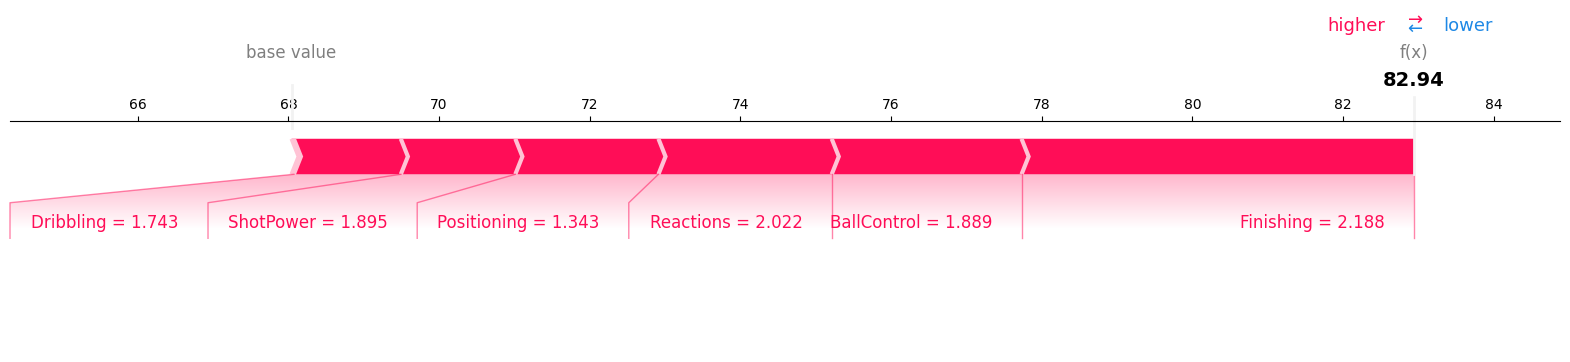

            (259399, R. Højlund, 2024)  shap
Finishing                         78.0  5.21
Dribbling                         75.0  1.42
BallControl                       76.0  2.52
Reactions                         75.0  2.30
ShotPower                         78.0  1.52
Age                               20.0  0.03
Positioning                       77.0  1.90


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


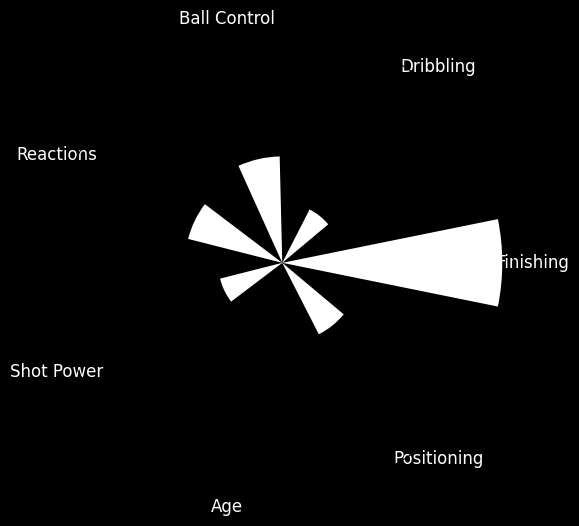

Finishing       0.35
Dribbling       0.10
Ball Control    0.17
Reactions       0.15
Shot Power      0.10
Age             0.00
Positioning     0.13
Name: shap, dtype: float64

In [105]:
ID = 259399

loaded_object = pd.read_pickle("prediction_prime_overall/data/models/forward_prime.pkl")[ 'Gradient Boosting Regressor']
model = loaded_object['Model']
scaler = loaded_object['Scaler']
explainer = loaded_object['explainer']
attributes = model.feature_names_in_
player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
player.rename(index=CONFIG.plot_feature_mapping, inplace=True)
create_polar_plot(player['shap'], positive_color= "white", negative_color='black')

pos_skills = player.shap[player.shap>0]
np.round(pos_skills/pos_skills.sum(),2)

# Center Forward

pred [79.32167917]
[(268421, 'M. Tel', 2024)]


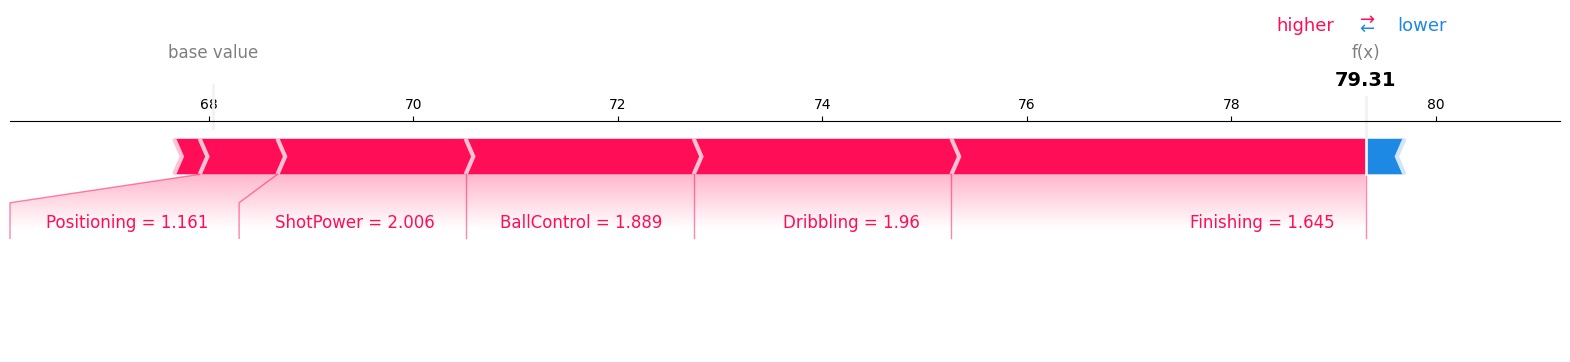

            (268421, M. Tel, 2024)  shap
Finishing                     74.0  4.05
Dribbling                     77.0  2.52
BallControl                   76.0  2.23
Reactions                     60.0 -0.38
ShotPower                     79.0  1.84
Age                           18.0  0.25
Positioning                   72.0  0.76


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


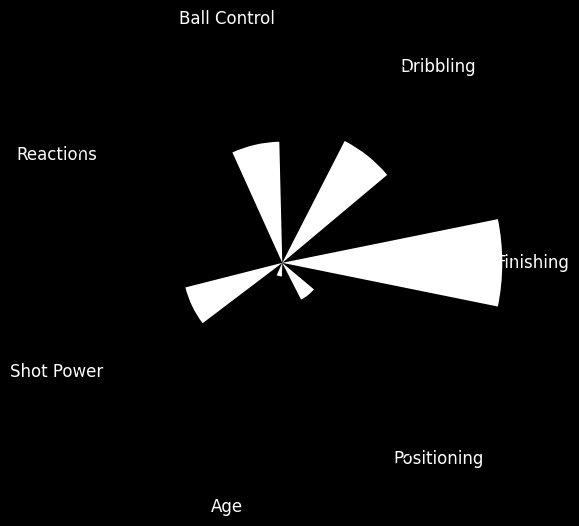

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [82.94918148]
[(259399, 'R. Højlund', 2024)]


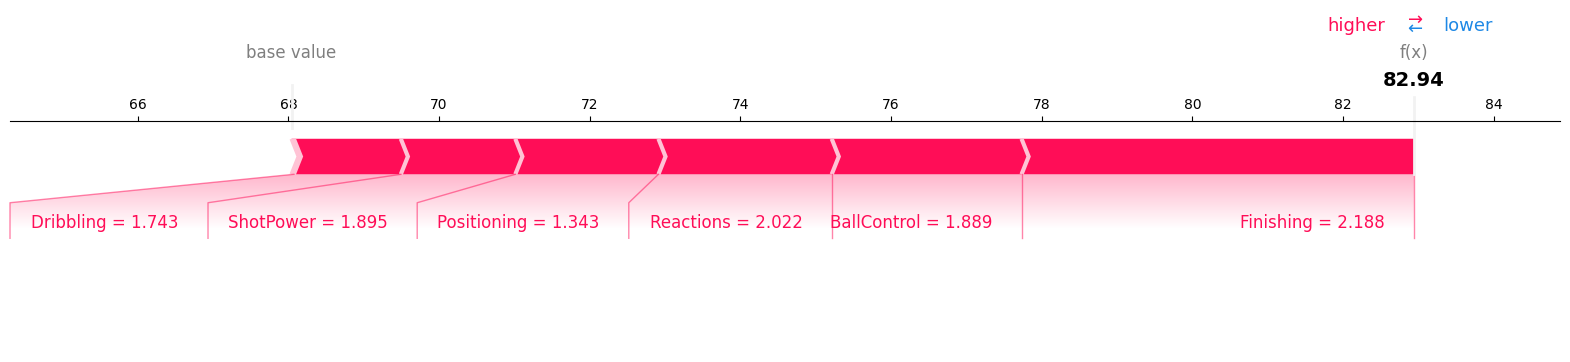

            (259399, R. Højlund, 2024)  shap
Finishing                         78.0  5.21
Dribbling                         75.0  1.42
BallControl                       76.0  2.52
Reactions                         75.0  2.30
ShotPower                         78.0  1.52
Age                               20.0  0.03
Positioning                       77.0  1.90


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


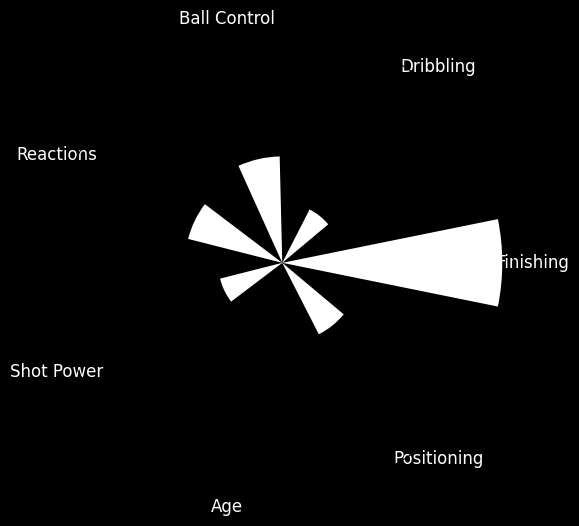

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [83.66719544]
[(240833, 'Y. Moukoko', 2024)]


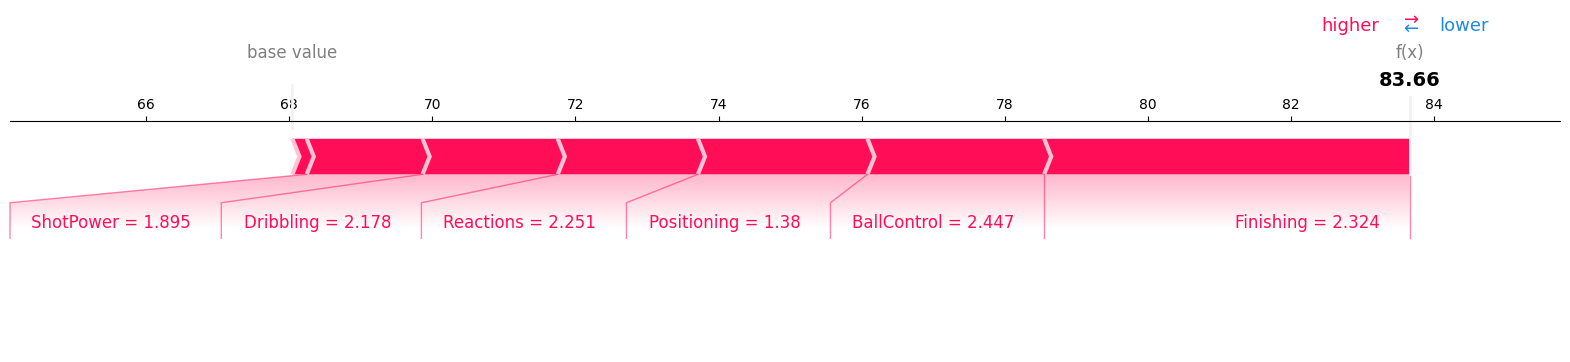

            (240833, Y. Moukoko, 2024)  shap
Finishing                         79.0  5.11
Dribbling                         79.0  1.89
BallControl                       81.0  2.47
Reactions                         77.0  1.96
ShotPower                         78.0  1.62
Age                               18.0  0.20
Positioning                       78.0  2.37


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


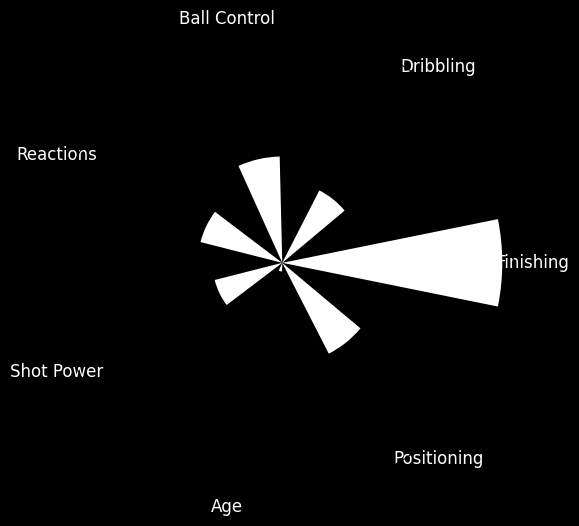

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [83.15020974]
[(251852, 'K. Adeyemi', 2024)]


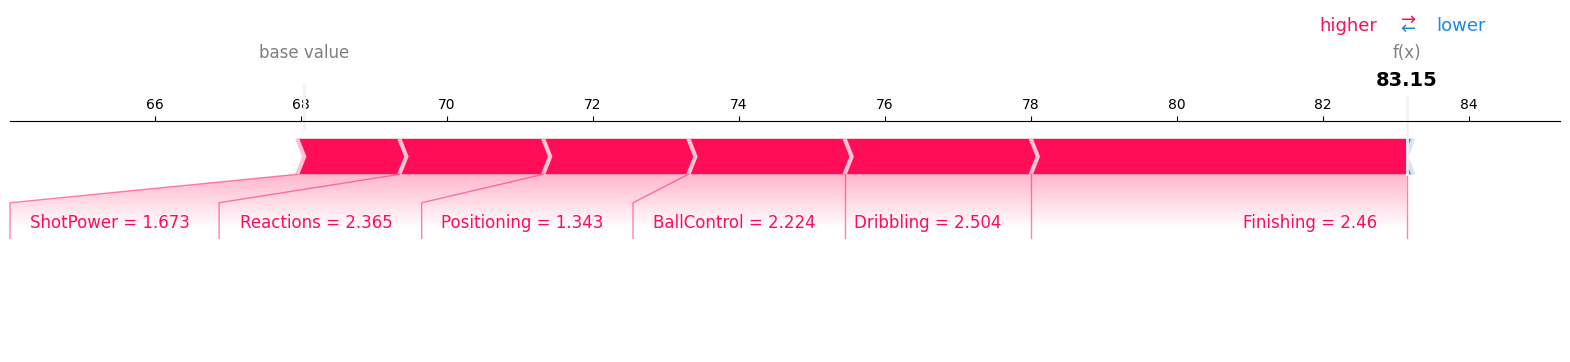

            (251852, K. Adeyemi, 2024)  shap
Finishing                         80.0  5.15
Dribbling                         82.0  2.55
BallControl                       79.0  2.14
Reactions                         78.0  1.97
ShotPower                         76.0  1.40
Age                               21.0 -0.09
Positioning                       77.0  1.99


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


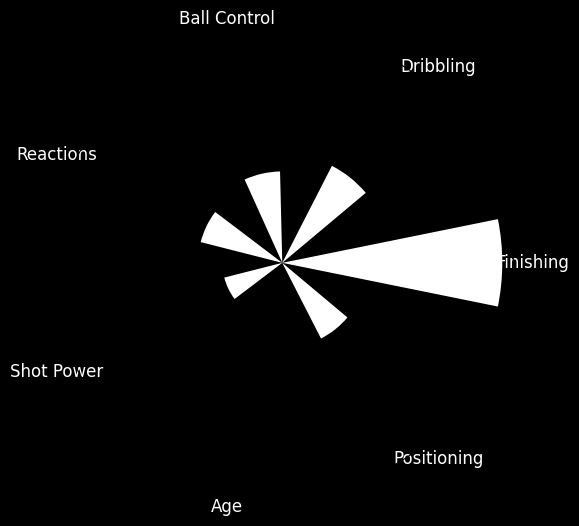

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [73.69655928]
[(256658, 'J. Ngankam', 2024)]


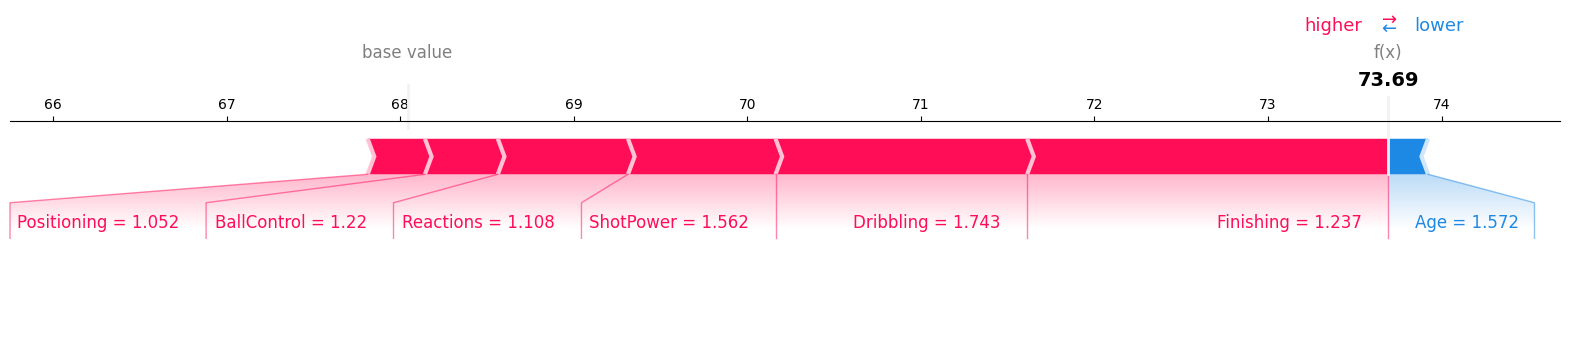

            (256658, J. Ngankam, 2024)  shap
Finishing                         71.0  2.08
Dribbling                         75.0  1.45
BallControl                       70.0  0.42
Reactions                         67.0  0.75
ShotPower                         75.0  0.85
Age                               22.0 -0.23
Positioning                       69.0  0.33


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


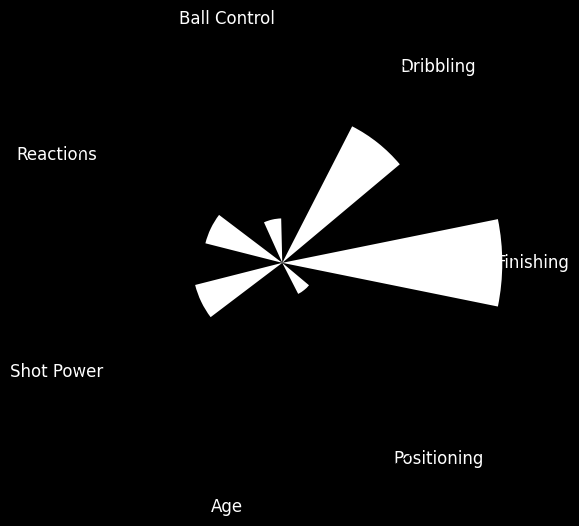

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [86.80537942]
[(256790, 'J. Musiala', 2024)]


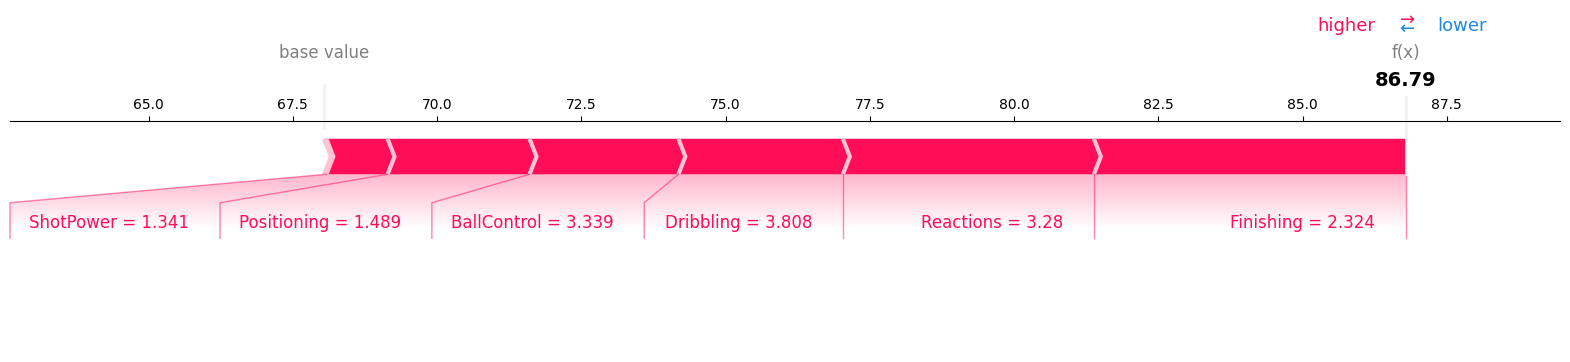

            (256790, J. Musiala, 2024)  shap
Finishing                         79.0  5.41
Dribbling                         94.0  2.85
BallControl                       89.0  2.58
Reactions                         86.0  4.35
ShotPower                         73.0  1.06
Age                               20.0  0.04
Positioning                       81.0  2.46


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


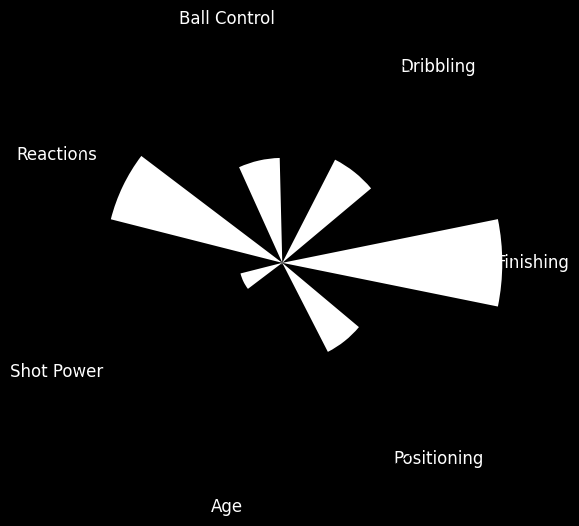

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [106]:
for ID in [268421,259399,240833,251852,256658,256790]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=CONFIG.plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "white", negative_color='black')
    
    print("-"*150)
    print("#"*150)

# Attacking Midfielder

In [107]:
import pickle
ACTUAL = "offense_potential_attacking_midfielder_age"
NAME = "attacking_midfielder_prime"
with open(f"{CONFIG.MODELS}/{NAME}.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Gradient Boosting Regressor']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])


              precision    recall  f1-score   support

       False       0.97      1.00      0.99        77
        True       0.00      0.00      0.00         2

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



In [108]:
player_attr = {	
    "ShortPassing":88,
 	"Finishing":84,
    "Positioning":85,
    "BallControl":89,
    "Dribbling":87,
    "Reactions":85,
    "Vision":88
}
input_model = pd.DataFrame(pd.Series(player_attr)).T
input_model = scaler.transform(input_model[model.feature_names_in_])
input_model

array([[3.03009171, 3.0727485 , 1.75726908, 2.98741221, 2.63813661,
        3.07375241]])

In [109]:

model.predict(input_model)

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


array([84.889722])

pred [84.889722]
[(251854, 'Pedri', 2024)]


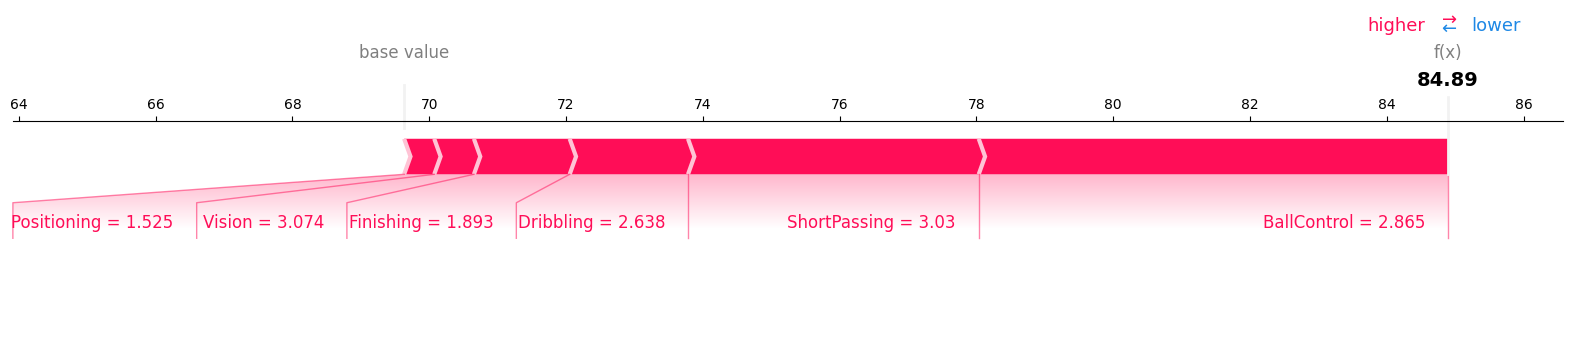

             (251854, Pedri, 2024)  shap
ShortPassing                  88.0  4.25
Finishing                     72.0  1.40
Positioning                   79.0  0.44
BallControl                   88.0  6.86
Dribbling                     87.0  1.73
Vision                        88.0  0.58


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


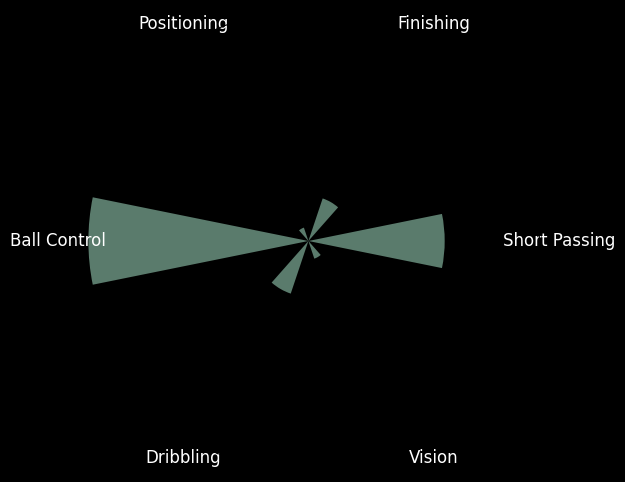

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [84.889722]
[(256630, 'F. Wirtz', 2024)]


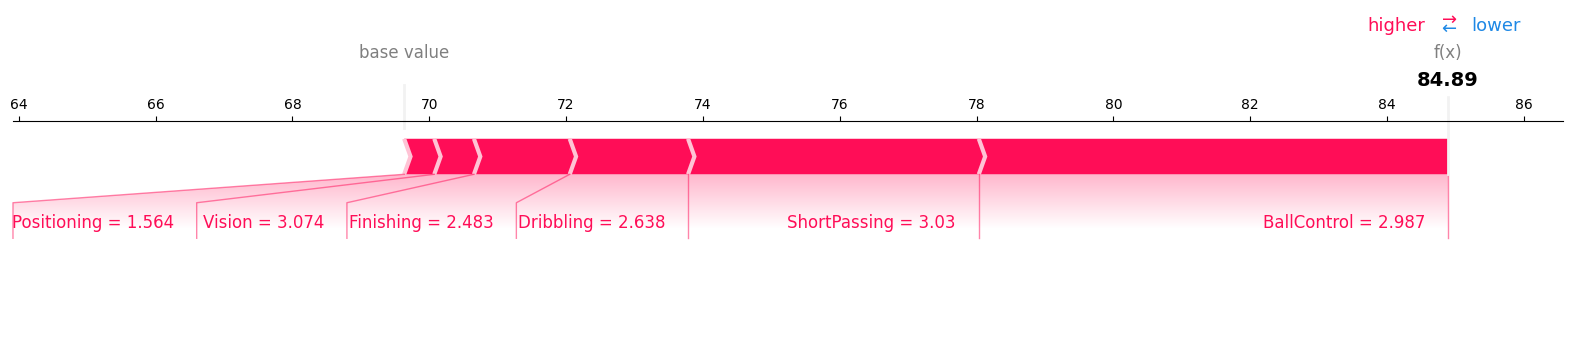

             (256630, F. Wirtz, 2024)  shap
ShortPassing                     88.0  4.25
Finishing                        78.0  1.40
Positioning                      80.0  0.44
BallControl                      89.0  6.86
Dribbling                        87.0  1.73
Vision                           88.0  0.58


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


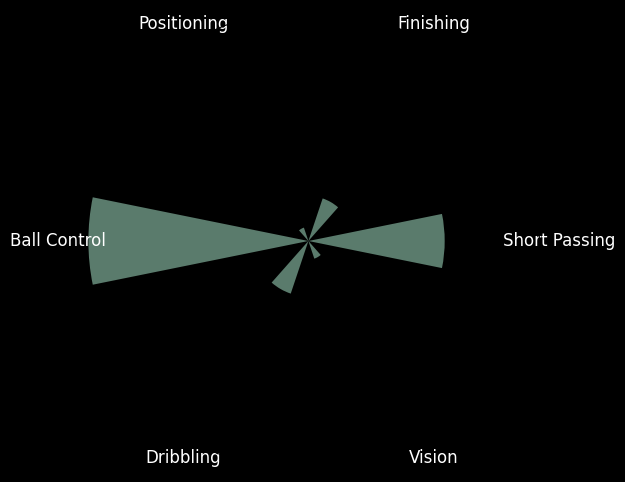

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [83.24051827]
[(256790, 'J. Musiala', 2024)]


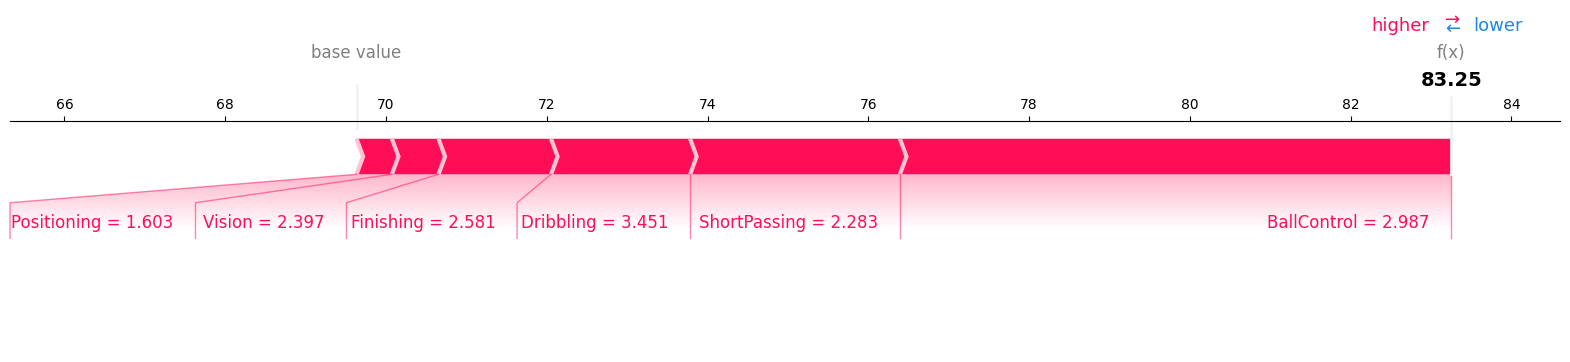

             (256790, J. Musiala, 2024)  shap
ShortPassing                       82.0  2.61
Finishing                          79.0  1.40
Positioning                        81.0  0.44
BallControl                        89.0  6.86
Dribbling                          94.0  1.73
Vision                             82.0  0.58


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


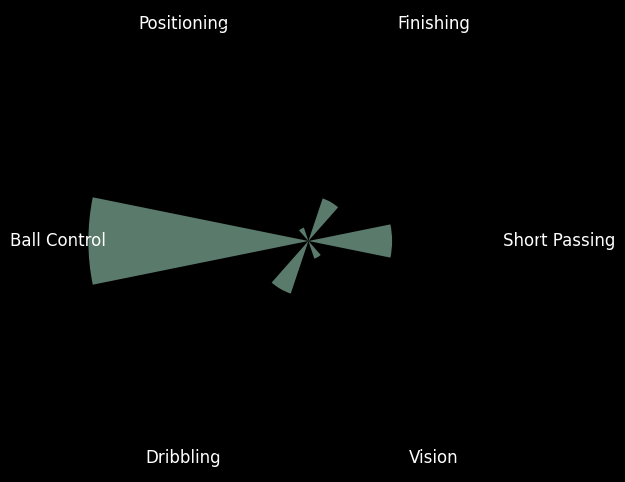

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [78.97663023]
[(251852, 'K. Adeyemi', 2024)]


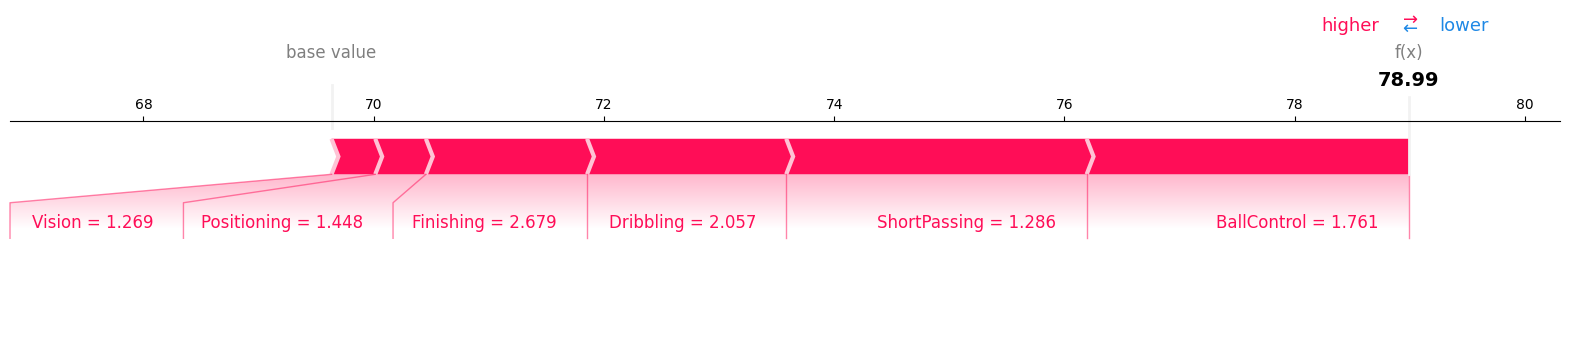

             (251852, K. Adeyemi, 2024)  shap
ShortPassing                       74.0  2.61
Finishing                          80.0  1.40
Positioning                        77.0  0.44
BallControl                        79.0  2.80
Dribbling                          82.0  1.73
Vision                             72.0  0.38


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


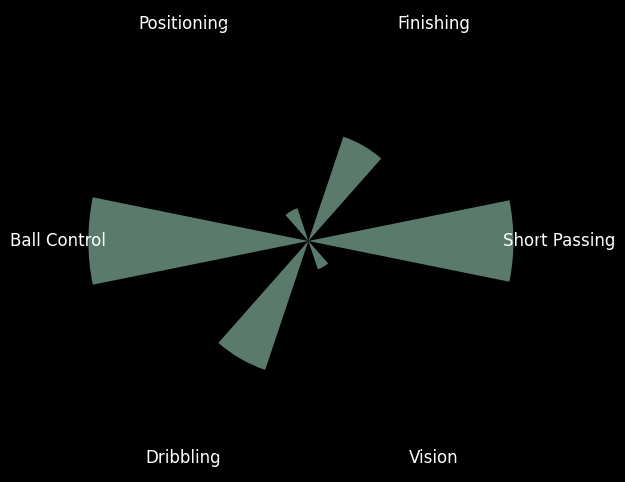

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [110]:

from config import plot_feature_mapping

for ID in [251854,256630,256790,251852]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)